# Tracking bottlenecks in the Muesli orders process
Sonia & Lina

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# hides warning messages
import warnings
warnings.filterwarnings("ignore")

#style for the plots
plt.style.use('fivethirtyeight')


In [2]:
#read data 
orders = pd.read_excel('data/muesli_raw_data.xlsx', header=1) #Please change your patch accordingly
orders.head(2)


,Index,Order ID,Order Date,Ship mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27.0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3.0,0.0,11.7741
1,45.0,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2.0,0.0,19.7714


Create dataframes for each excel sheet:

In [3]:
#clean orders dataframe
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(" ","_")
orders.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,27.0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3.0,0.0,11.7741
1,45.0,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2.0,0.0,19.7714


In [4]:
#create arrival df
arrival= pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='Campaign Data')

#clean arrival df
arrival.columns = arrival.columns.str.lower()
arrival.columns = arrival.columns.str.replace(" ","_")
arrival.head(2)

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron


In [5]:
#create truck df
truck = pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='Order Process Data')

#clean truck df
truck.columns = truck.columns.str.lower()
truck.columns = truck.columns.str.replace(" ","_")
truck.head(2)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074.0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919.0,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing


In [6]:
truck.drop_duplicates(subset='order_id', inplace=True)
truck.drop('row_id', axis=1)

,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
6,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing
8,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing
...,...,...,...,...
5890,CA-2020-130631,2020-12-29,2021-01-06,Standard Processing
5892,CA-2020-126221,2020-12-30,2021-01-06,Standard Processing
5893,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5896,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing


In [7]:
truck.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              3002 non-null   float64       
 1   order_id            3002 non-null   object        
 2   order_date          3002 non-null   datetime64[ns]
 3   on_truck_scan_date  3002 non-null   datetime64[ns]
 4   ship_mode           3002 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 140.7+ KB


In [8]:
#create ready_pickup df
ready_pickup = pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='InternData Study')

#clean ready_pickup df
ready_pickup.columns = ready_pickup.columns.str.lower()
ready_pickup.columns = ready_pickup.columns.str.replace(" ","_")
ready_pickup.head(2)

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03


Joining dataframes for overall lead time KPI:

In [9]:
#joining orders and arrivals = df1
df1= pd.merge(orders, arrival, on= "order_id", how= "inner")
df1.drop_duplicates(subset='order_id', inplace=True)
df1.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name_x,origin_channel,country/region,city,state,...,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date,customer_name_y
0,252.0,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,West,Special Projects Muesil,Gluten Free,TEC-AC-10003832,3347.37,13.0,0.0,636.0003,2019-09-23,Kelly Collister
2,325.0,CA-2019-162138,2019-04-23,Standard Class,GK-14620,Grace Kelly,Sales,United States,Hesperia,California,...,West,Special Projects Muesil,Gluten Free,TEC-AC-10001908,99.99,1.0,0.0,34.9965,2019-05-06,Grace Kelly


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 667
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              333 non-null    float64       
 1   order_id           333 non-null    object        
 2   order_date         333 non-null    datetime64[ns]
 3   ship_mode          333 non-null    object        
 4   customer_id        333 non-null    object        
 5   customer_name_x    333 non-null    object        
 6   origin_channel     333 non-null    object        
 7   country/region     333 non-null    object        
 8   city               333 non-null    object        
 9   state              333 non-null    object        
 10  postal_code        333 non-null    float64       
 11  region             333 non-null    object        
 12  category           333 non-null    object        
 13  sub-category       333 non-null    object        
 14  product_id

TIME BETWEEN ORDER DATE AND THE ARRIVAL TO CUSTOMER

In [11]:
#df1 has order dates and arrivals for the gerneral lead time kpi
df1 = df1[["order_id", "order_date", "arrival_scan_date"]]

#create columns for day difference
df1["day_dif_order"]= (df1["arrival_scan_date"]-df1["order_date"]).dt.days
df1.head(2)


,order_id,order_date,arrival_scan_date,day_dif_order
0,CA-2019-145625,2019-09-11,2019-09-23,12
2,CA-2019-162138,2019-04-23,2019-05-06,13


# Inspecting Duplicates

In [12]:
duplicates_df1 = df1[df1.duplicated(keep=False)].shape
print(f'duplicates for df1: {duplicates_df1[0]}') 

duplicates_arrival = arrival[arrival.duplicated(keep=False)].shape
print(f'duplicates for arrival: {duplicates_arrival[0]}')

duplicates_truck = truck[truck.duplicated(keep=False)].shape
print(f'duplicates for truck: {duplicates_truck[0]}')

duplicates_ready_pickup = ready_pickup[ready_pickup.duplicated(keep=False)].shape
print(f'duplicates for ready_pickup: {duplicates_ready_pickup[0]}')
# 147 of 290 rows are duplicated in the ready_pickup df

duplicates for df1: 0
duplicates for arrival: 0
duplicates for truck: 0
duplicates for ready_pickup: 147


# Plotting overall leadtime 

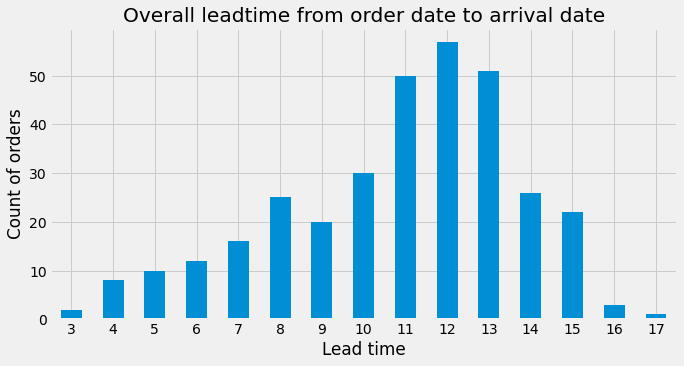

In [13]:

fig, ax = plt.subplots(figsize=(10,5))
(
    df1
    .groupby('day_dif_order')
    .count()['order_id']
    .plot.bar(rot=360) 
)
ax.set_title('Overall leadtime from order date to arrival date')

ax.set_xlabel('Lead time');
ax.set_ylabel('Count of orders');

We have less data here.
## according to company estimation it should take 3 days at the worth case.
They are on time based on the data that we have. So there should be a problem processing the orders in warehouse. 
Company needs to have more inspectors to see what happens in warehouse. 

In [14]:
#summary statistics for first kpi
#according to company estimation it should take 13 day in the worth case.
df1.describe()["day_dif_order"].round(1)

count    333.0
mean      10.8
std        2.9
min        3.0
25%        9.0
50%       11.0
75%       13.0
max       17.0
Name: day_dif_order, dtype: float64

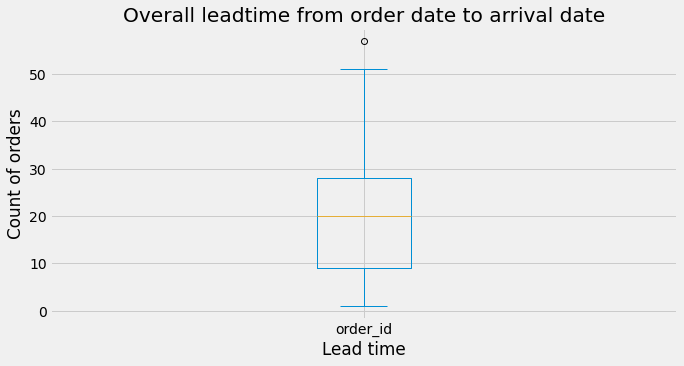

In [15]:
#boxplot to understand the variation of delivary dates
fig, ax = plt.subplots(figsize=(10,5))
(
    df1
    .groupby('day_dif_order')
    .count()['order_id']
    .plot.box() 
)
ax.set_title('Overall leadtime from order date to arrival date')

ax.set_xlabel('Lead time');
ax.set_ylabel('Count of orders');



# According to box plot more than half of orders had the delivery date more then 12 days.
So muesli company in not on time based on his estimated delivery time based on the data that we have.

# FIRST KPI WITH SHIP MODE

In [41]:
#joining df1 and truck for ship mode
# lead_t_shipmode = pd.concat([df1, truck], axis=1, join='inner
lead_t_shipmode = df1.merge(truck, how='inner', on='order_id', suffixes=('_ord', 'truck_'))
lead_t_shipmode.head(2)

,order_id,order_date_ord,arrival_scan_date,day_dif_order,row_id,order_datetruck_,on_truck_scan_date,ship_mode,truck_day_dif
0,CA-2019-145625,2019-09-11,2019-09-23,12,251.0,2019-09-11,2019-09-18,Standard Processing,7
1,CA-2019-162138,2019-04-23,2019-05-06,13,324.0,2019-04-23,2019-05-01,Standard Processing,8


In [40]:
lead_t_shipmode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        333 non-null    object        
 1   order_date_ord  333 non-null    datetime64[ns]
 2   Avg. Lead Time  333 non-null    int64         
 3   Shipping Mode   333 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 13.0+ KB


In [42]:
#choosing the columns we need and cleaning columns
lead_t_shipmode = lead_t_shipmode[['order_id', 'order_date_ord', 'day_dif_order', 'ship_mode']]
lead_t_shipmode.head(2)

,order_id,order_date_ord,day_dif_order,ship_mode
0,CA-2019-145625,2019-09-11,12,Standard Processing
1,CA-2019-162138,2019-04-23,13,Standard Processing


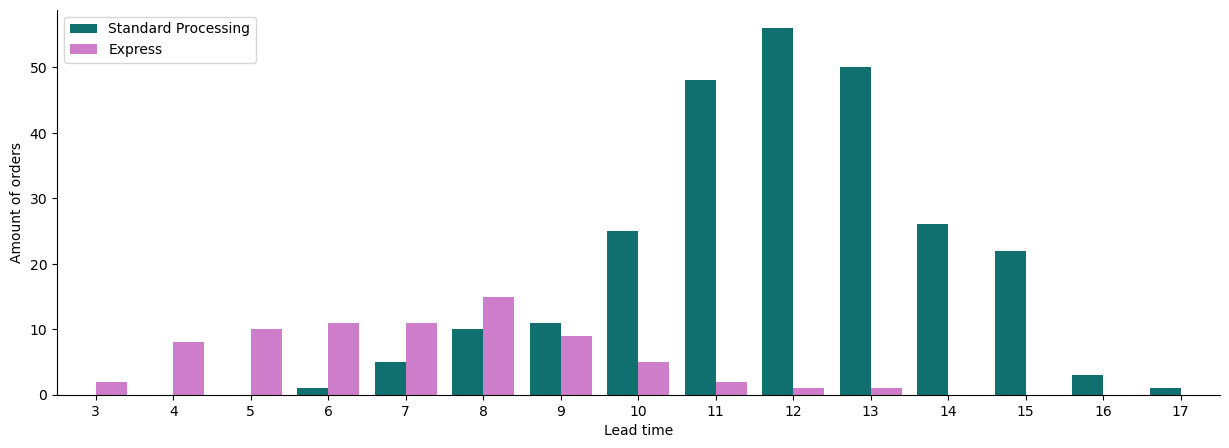

In [53]:
#Rebecca's

with plt.style.context('default'): #evoke style TEMPORARILY!
    
    fig = plt.figure(figsize=(15,5))
    fig = sns.countplot( x=lead_t_shipmode['day_dif_order'], hue=lead_t_shipmode['ship_mode'], palette=['#008080', '#da70d6']) #hue serves a group by
    plt.legend(loc='upper left')
    fig.set_xlabel('Lead time')
    fig.set_ylabel('Amount of orders')
    # plt.box(on=None) #this line takes all the box off
    fig.spines['right'].set_color('none') # turn off the right spine
    fig.spines['top'].set_color('none') #turn off the top spine


In [20]:
#shipment aggregated by overall lead time
kpi1 = pd.crosstab(lead_t_shipmode['day_dif_order'], columns=lead_t_shipmode['ship_mode'])
kpi1 

ship_mode,Express,Standard Processing
day_dif_order,,
3,2,0
4,8,0
5,10,0
6,11,1
7,11,5
8,15,10
9,9,11
10,5,25
11,2,48


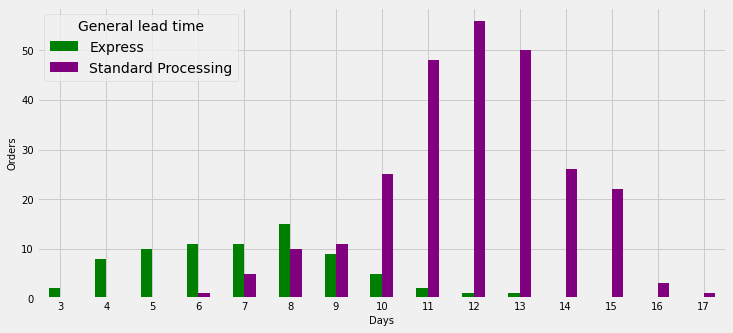

In [21]:
#PLOTTING FIRST KPI1 WITH SHIP MODE 

kpi1_visual = pd.crosstab(lead_t_shipmode['day_dif_order'], 
                        lead_t_shipmode['ship_mode']).plot(kind='bar', 
                        stacked=False, figsize=(11,5), 
                        fontsize=10, 
                        color=['green', 'purple'], rot=360)
kpi1_visual.legend(title='General lead time')
kpi1_visual.set_xlabel('Days', fontsize=10)
kpi1_visual.set_ylabel('Orders', fontsize=10);

In [22]:
#Average overall lead time for each shipment type -> Not a big difference

lead_t_shipmode.rename(columns={'day_dif_order': 'Avg. Lead Time', 'truck_day_dif': 'Days for order to be ready', 'ship_mode': 'Shipping Mode'}, inplace=True)
lead_t_shipmode.groupby('Shipping Mode').mean().round(1)

,Avg. Lead Time
Shipping Mode,
Express,7.1
Standard Processing,11.9


# TIME BETWEEN ORDER DATE AND LOADING MUESLI ON THE TRUCK


In [23]:
#we don't need to join orders with truck because the 5899 entries already have both the order_date and the truck_date :D

#create columns for day difference
truck['truck_day_dif'] = (truck['on_truck_scan_date'] - truck['order_date']).dt.days
truck.head(2)


,row_id,order_id,order_date,on_truck_scan_date,ship_mode,truck_day_dif
0,3074.0,CA-2019-125206,2019-01-03,2019-01-07,Express,4
1,4919.0,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,7


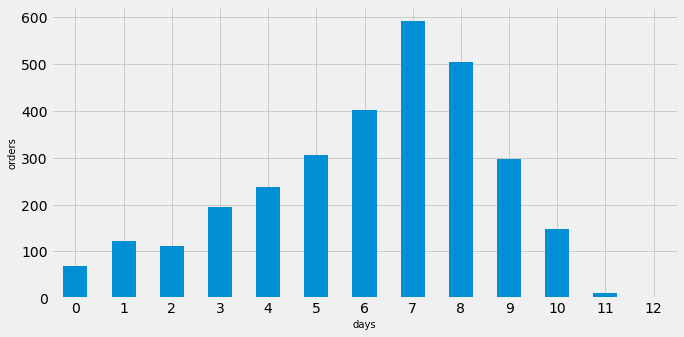

In [24]:
#plotting leadtime_muesli
fig, ax = plt.subplots(figsize=(10,5))
(
    truck
    .groupby('truck_day_dif')
    .count()['row_id']
    .plot.bar(rot=360) 
)

ax.set_xlabel('days', fontsize=10);
ax.set_ylabel('orders', fontsize=10);

Summary statistics for the second kpi (order-date and on truck delivery date)

It should take 6 days at the worse case.
we have complete data

In [25]:
truck.describe()["truck_day_dif"].round(1)

count    3002.0
mean        6.1
std         2.5
min         0.0
25%         5.0
50%         7.0
75%         8.0
max        12.0
Name: truck_day_dif, dtype: float64

# Box plot for second kpi
here also it takes more than worse case scenario for the orders to be loaded on truck.
for more than half of orders it takes more that 6 days to be loaded on trucks.
It seems to be a problem in ready to ship process. 
In next step we want to see what happens from ready to ship date and on truck scan date.

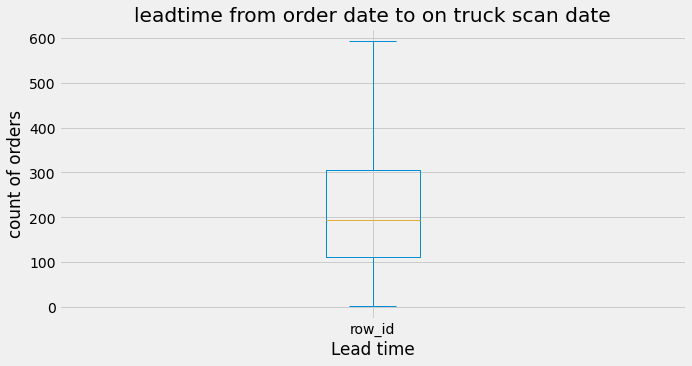

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
(
    truck
    .groupby('truck_day_dif')
    .count()['row_id']
    .plot.box() 
)
ax.set_title('leadtime from order date to on truck scan date')

ax.set_xlabel('Lead time');
ax.set_ylabel('count of orders');

# TIME BETWEEN READY TO SHIP AND BEING LOADED IN THE TRUCK

In [27]:
#join truck and ready_pickup
df3= pd.merge(truck, ready_pickup, on= "order_id", how= "inner")
df3.head(2)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode,truck_day_dif,ready_to_ship_date,pickup_date
0,3416.0,CA-2019-116540,2019-09-02,2019-09-03,Express,1,2019-09-02,2019-09-03
1,3416.0,CA-2019-116540,2019-09-02,2019-09-03,Express,1,2019-09-02,2019-09-03


In [28]:
# lead time from on truck scan date and ready to ship date
df3['ready_to_ship_on_truck_dif'] = (df3['on_truck_scan_date'] - df3['ready_to_ship_date']).dt.days
df3.head(2)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode,truck_day_dif,ready_to_ship_date,pickup_date,ready_to_ship_on_truck_dif
0,3416.0,CA-2019-116540,2019-09-02,2019-09-03,Express,1,2019-09-02,2019-09-03,1
1,3416.0,CA-2019-116540,2019-09-02,2019-09-03,Express,1,2019-09-02,2019-09-03,1


In [29]:
df3['ready_to_ship_on_truck_dif'].value_counts()


2    119
1     76
3     55
0     40
Name: ready_to_ship_on_truck_dif, dtype: int64

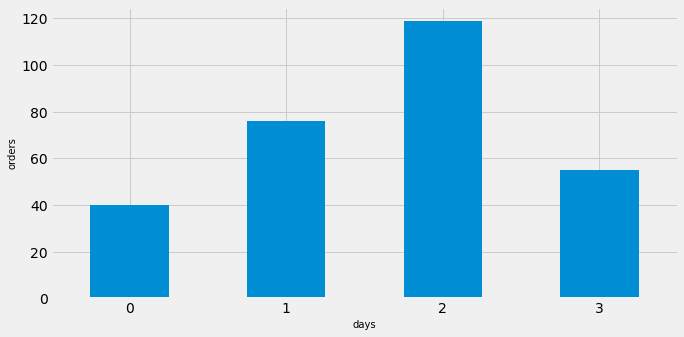

In [30]:
# plotting leadtime from ready to ship date to on truck scan date
fig, ax = plt.subplots(figsize=(10,5))
(
    df3
    .groupby('ready_to_ship_on_truck_dif')
    .count()['order_id']
    .plot.bar(rot=360)
    
)
ax.set_xlabel('days', fontsize=10);
ax.set_ylabel('orders', fontsize=10);

We have less data here.
According to campany estimation it should take 3 days at the worth case.
They are working good based on the data that we have. so there should be a problem
Processing the orders in warehouse. company needs to have more inspectors to see what happens in warehouse.

In [31]:
df3.describe()['ready_to_ship_on_truck_dif'].round(1)

count    290.0
mean       1.7
std        0.9
min        0.0
25%        1.0
50%        2.0
75%        2.0
max        3.0
Name: ready_to_ship_on_truck_dif, dtype: float64

# Lead time between on truck scan date and arrival scan date.

In [32]:
#merging truck and arrival info
shipment = pd.merge(truck, arrival, on="order_id", how= "right")
#created a column for weekday
shipment["on_truck_arrival_diff"]= (shipment["arrival_scan_date"] - shipment["on_truck_scan_date"]).dt.days
#count the values
shipment["on_truck_arrival_diff"].value_counts()
shipment.describe().round()

,row_id,truck_day_dif,on_truck_arrival_diff
count,333.0,333.0,333.0
mean,5040.0,6.0,5.0
std,2982.0,3.0,1.0
min,1.0,0.0,1.0
25%,2408.0,5.0,4.0
50%,5163.0,7.0,5.0
75%,7725.0,8.0,5.0
max,9987.0,12.0,7.0


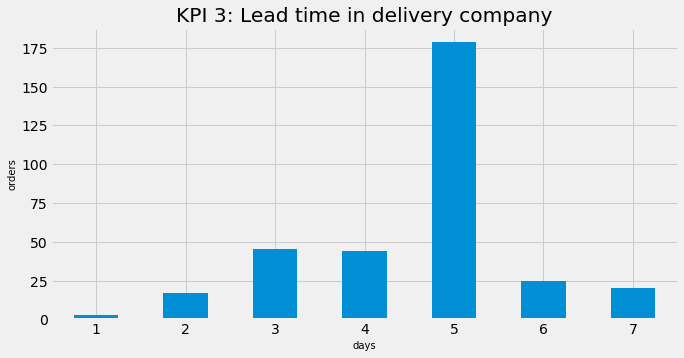

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
(
    shipment
    .groupby("on_truck_arrival_diff")
    .count()['order_id']
    .plot.bar(rot=360) 
)

ax.set_xlabel('days', fontsize = 10);
ax.set_ylabel('orders', fontsize = 10)
ax.set_title('KPI 3: Lead time in delivery company');

# Summary statistics
According to campany estimation it should take about 5 days.
Orders are arriving at costumers on avarage in less than 4 days so delivery company is on time on average

In [34]:
shipment.describe()["on_truck_arrival_diff"].round(1)

count    333.0
mean       4.6
std        1.2
min        1.0
25%        4.0
50%        5.0
75%        5.0
max        7.0
Name: on_truck_arrival_diff, dtype: float64

# EXTRA CREDIT:

In [35]:

#create columns for arrivals date
arrival["arrival_weekday"]= (arrival['arrival_scan_date']).dt.dayofweek
#get 95%
ninetyfive_percent_arrivals = arrival.quantile(0.95)
print(ninetyfive_percent_arrivals)

print(f'The 95% of the arrivals are done on Fridays')



arrival_weekday    4.0
Name: 0.95, dtype: float64
The 95% of the arrivals are done on Fridays


In [36]:
#create columns for orders date
orders["orders_weekday"]= (orders['order_date']).dt.dayofweek
#get 95%
ninetyfive_percent_orders_date = orders.quantile(0.95)
print(ninetyfive_percent_orders_date)

print(f'The 95% of the orders are made on Sunday')


index              9494.350000
postal_code       98006.000000
sales               956.984245
quantity              8.000000
discount              0.700000
profit              168.470400
orders_weekday        6.000000
Name: 0.95, dtype: float64
The 95% of the orders are made on Sunday


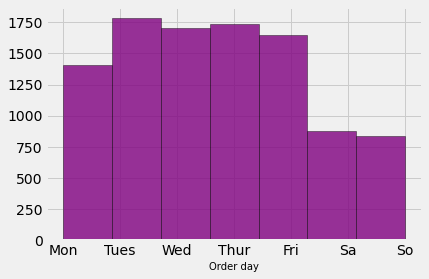

In [37]:
plt.hist(x=orders['orders_weekday'], bins=7, alpha=0.8, edgecolor='k', color='purple');
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sa', 'So']);
plt.xlabel('Order day', fontsize = 10);